### Monte Carlo Simulation for stock prices

In [1]:
# Importing all the pacakges

import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('ggplot')

In [3]:
start = dt.datetime(2019, 2, 2)
end = dt.datetime(2019, 12, 30)

In [4]:
print(start)
print(end)
print(end-start)

2019-02-02 00:00:00
2019-12-30 00:00:00
331 days, 0:00:00


In [5]:
prices = web.DataReader('AAPL', 'yahoo', start, end)
print(prices.head())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-02-04  171.660004  167.279999  167.410004  171.250000  31495500.0   
2019-02-05  175.080002  172.350006  172.860001  174.179993  36101600.0   
2019-02-06  175.570007  172.850006  174.649994  174.240005  28239600.0   
2019-02-07  173.940002  170.339996  172.399994  170.940002  31741700.0   
2019-02-08  170.660004  168.419998  168.990005  170.410004  23820000.0   

             Adj Close  
Date                    
2019-02-04  168.315582  
2019-02-05  171.195389  
2019-02-06  171.254364  
2019-02-07  168.010910  
2019-02-08  168.208328  


In [6]:
prices_new = prices['Close']
print(prices_new.head())

Date
2019-02-04    171.250000
2019-02-05    174.179993
2019-02-06    174.240005
2019-02-07    170.940002
2019-02-08    170.410004
Name: Close, dtype: float64


In [7]:
# write returns and the last closing price

returns = prices_new.pct_change()

last_price = prices_new[-1]

print(returns.head())
print('*The Last Price is : ', last_price) 

Date
2019-02-04         NaN
2019-02-05    0.017109
2019-02-06    0.000345
2019-02-07   -0.018939
2019-02-08   -0.003100
Name: Close, dtype: float64
*The Last Price is :  291.5199890136719


In [8]:
# Number of Simulations

num_simulations = 1000
num_days = 331

In [9]:
# Using nested for loop for simulation

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price*(1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y  in range(num_days):
        if count == 331:
            break
        price = price_series[count]*(1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
        
    simulation_df[x] = price_series

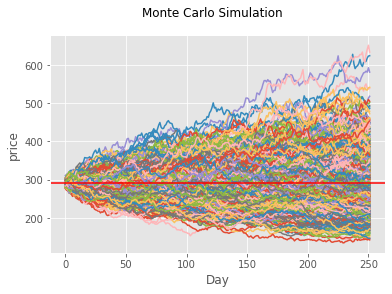

In [10]:
# Plotting data

fig = plt.figure()
fig.suptitle('Monte Carlo Simulation')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('price')
plt.show()